In [ ]:
!pip install yt-dlp
!pip install pydub
!pip install pandas
!pip install matplotlib
!pip install ruptures
!pip install librosa

In [ ]:
import yt_dlp
import os
import shutil
from pydub import AudioSegment
import numpy as np
import librosa
import ruptures as rpt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
def download_audio(video_url, output_path="."):
    """Downloads audio from a YouTube video URL using yt-dlp."""

    ydl_opts = {
        'format': 'bestaudio/best',  # Choose best audio quality
        'outtmpl': f"{output_path}/%(title)s.%(ext)s",  # Output file name template
        'extract-audio': True,  # Only download audio
        'audio-format': 'wav',  # Convert to MP3 format  # Load cookies from Chrome to avoid bot detection
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([video_url])

video_urls = ["https://www.youtube.com/watch?v=1BUBVkpQQGA",
              "https://www.youtube.com/watch?v=inDZp80Sq6U",
              "https://www.youtube.com/watch?v=m_7Bm1gyq2c",
              "https://www.youtube.com/watch?v=sNcBUOlGBcg",
              "https://www.youtube.com/watch?v=n2lTpPptOWA"
]

for url in video_urls:
    download_audio(url, output_path="audio_download")

[youtube] Extracting URL: https://www.youtube.com/watch?v=1BUBVkpQQGA
[youtube] 1BUBVkpQQGA: Downloading webpage
[youtube] 1BUBVkpQQGA: Downloading ios player API JSON
[youtube] 1BUBVkpQQGA: Downloading mweb player API JSON
[youtube] 1BUBVkpQQGA: Downloading m3u8 information
[info] 1BUBVkpQQGA: Downloading 1 format(s): 251
[download] audio_download/Revolutionary Road (1⧸8) Movie CLIP - You're Sick! (2008) HD.webm has already been downloaded
[download] 100% of    2.34MiB
[youtube] Extracting URL: https://www.youtube.com/watch?v=inDZp80Sq6U
[youtube] inDZp80Sq6U: Downloading webpage
[youtube] inDZp80Sq6U: Downloading ios player API JSON
[youtube] inDZp80Sq6U: Downloading mweb player API JSON
[youtube] inDZp80Sq6U: Downloading m3u8 information
[info] inDZp80Sq6U: Downloading 1 format(s): 251
[download] audio_download/Revolutionary Road (3⧸8) Movie CLIP - The Nice Young Wheelers Are Taking Off (2008) HD.webm has already been downloaded
[download] 100% of    1.85MiB
[youtube] Extracting URL

In [ ]:
source_dir = "/content/audio_download"
destination_dir = "/content/converted_audios"  # Specify your desired destination directory

os.makedirs(destination_dir, exist_ok=True)  # Create the destination directory if it doesn't exist

file_list = sorted(os.listdir(source_dir))  # Get and sort files alphabetically

for i, filename in enumerate(file_list):
    source_path = os.path.join(source_dir, filename)
    destination_name = f"{(1 + i)}.wav"  # Generate alphabetical name (a.mp3, b.mp3, ...)
    destination_path = os.path.join(destination_dir, destination_name)

    if filename.endswith(".webm"):
        # Convert webm to mp3 using pydub
        audio = AudioSegment.from_file(source_path, format="webm")
        audio.export(destination_path, format="wav")
    else:
        # Copy other file types directly
        shutil.copy(source_path, destination_path)

print("Files renamed, converted, and saved to:", destination_dir)

Files renamed, converted, and saved to: /content/converted_audios


In [ ]:
# Define cut segments for each file (in milliseconds)
cut_segments = {
    "1.wav": [(0, 33200)],
    "2.wav": [(39000, 47500)],
    "3.wav": [(14500, 18500), (62000, 70500)],
    "4.wav": [(108000, 120000)],
    "5.wav": [(28000, 39500)],
}

audio_dir = "/content/converted_audios"  # Directory containing the MP3 files
output_dir = "/content/cut_audios"  # Directory to save the cut segments

os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

for filename, segments in cut_segments.items():
    audio_path = os.path.join(audio_dir, filename)
    audio = AudioSegment.from_file(audio_path, format="wav")

    for i, (start_time, end_time) in enumerate(segments):
        segment = audio[start_time:end_time]
        output_path = os.path.join(output_dir, f"{filename[:-4]}_segment_{i + 1}.wav")  # e.g., 1_segment_1.mp3
        segment.export(output_path, format="wav")

print("Cut segments saved to:", output_dir)

Cut segments saved to: /content/cut_audios


Processing audio file: /content/cut_audios/1_segment_1.wav


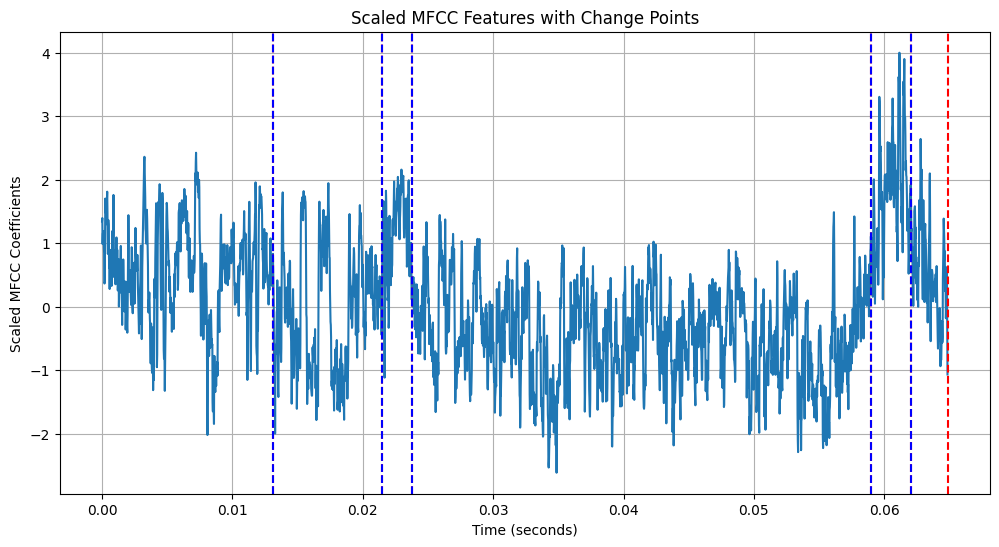

[0, 6718, 10984, 12158, 30181, 31781, 33200]
Audio file '1_segment_1.wav' split into 6 segments and saved to '/content/cut_audios_by_emotions'
Processing audio file: /content/cut_audios/2_segment_1.wav


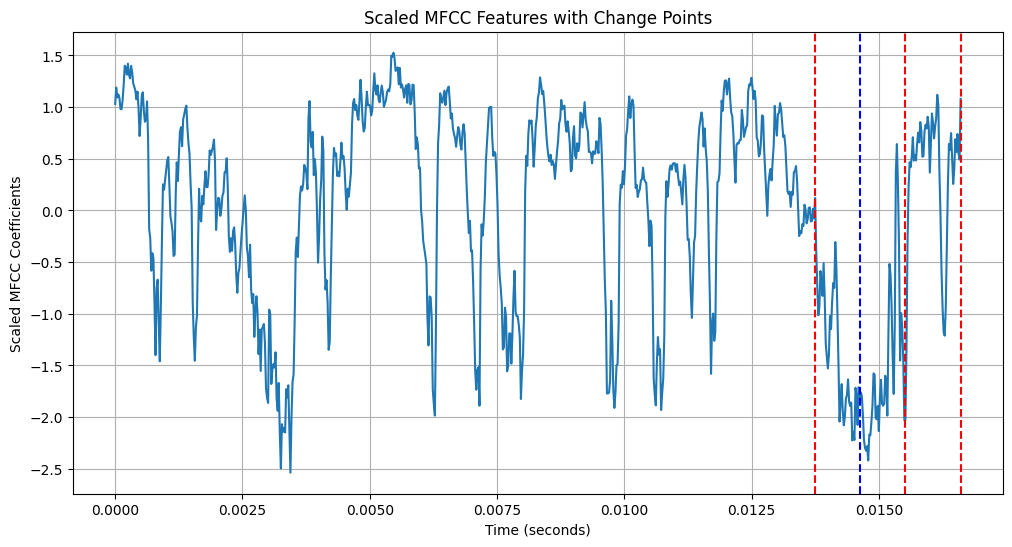

[0, 7492, 8500]
Audio file '2_segment_1.wav' split into 2 segments and saved to '/content/cut_audios_by_emotions'
Processing audio file: /content/cut_audios/3_segment_1.wav


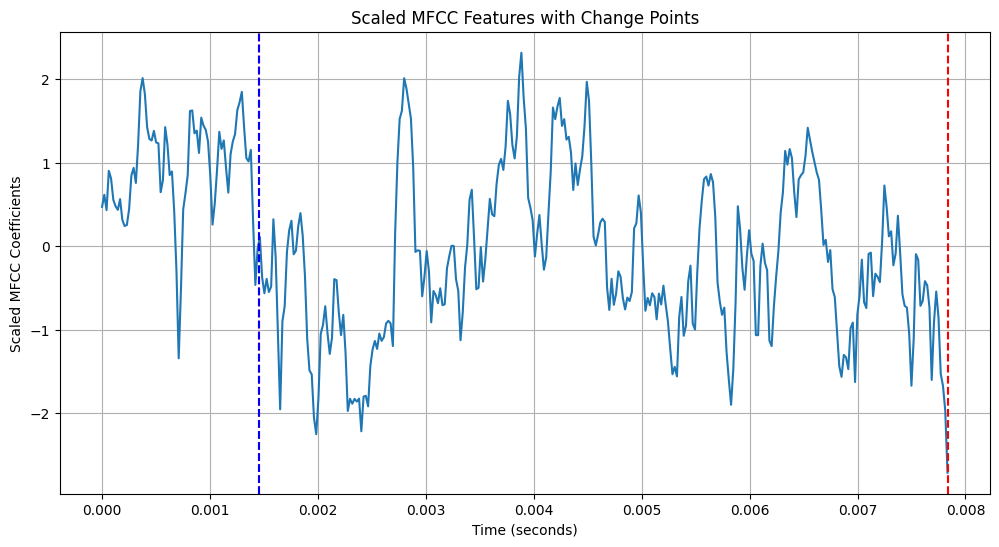

[0, 744, 4000]
Audio file '3_segment_1.wav' split into 2 segments and saved to '/content/cut_audios_by_emotions'
Processing audio file: /content/cut_audios/3_segment_2.wav


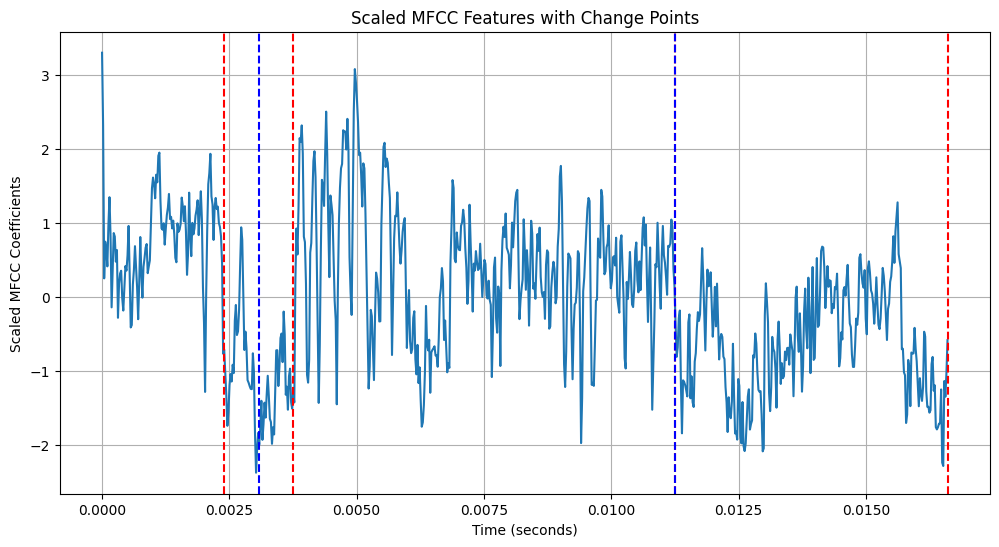

[0, 1573, 5759, 8500]
Audio file '3_segment_2.wav' split into 3 segments and saved to '/content/cut_audios_by_emotions'
Processing audio file: /content/cut_audios/4_segment_1.wav


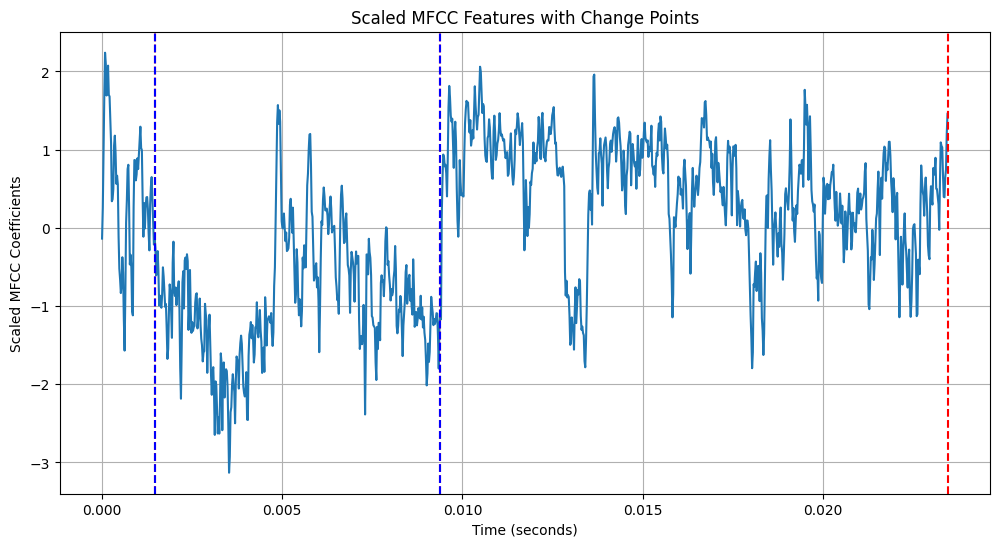

[0, 746, 4795, 12000]
Audio file '4_segment_1.wav' split into 3 segments and saved to '/content/cut_audios_by_emotions'
Processing audio file: /content/cut_audios/5_segment_1.wav


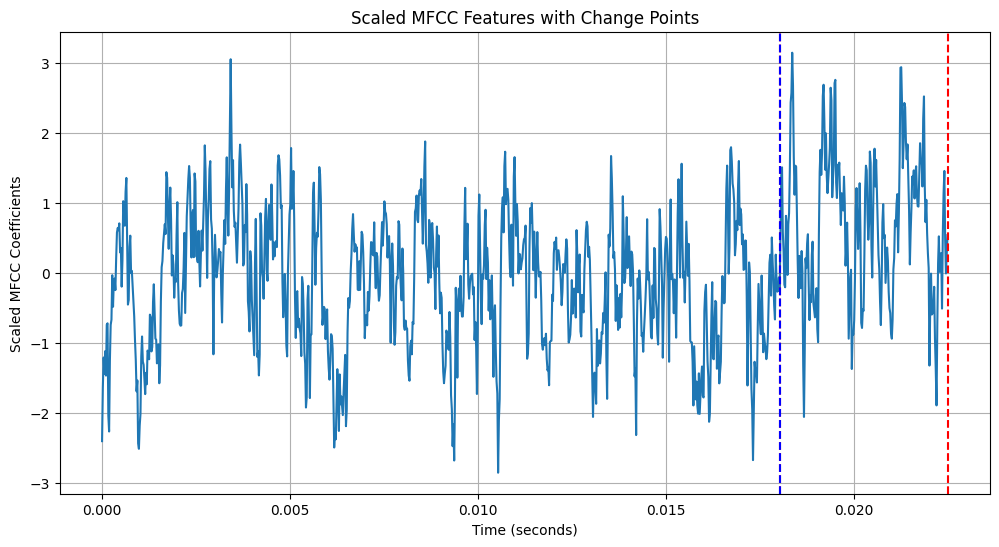

[0, 9219, 11500]
Audio file '5_segment_1.wav' split into 2 segments and saved to '/content/cut_audios_by_emotions'


In [ ]:
def split_audio_by_timestamps(audio_file_path, timestamps, output_dir):
    """
    Splits an audio file into multiple segments based on timestamps.

    Args:
        audio_file_path (str): Path to the input audio file.
        timestamps (list): A list of timestamps (in seconds) where the audio should be split.
        output_dir (str): Directory to save the split audio segments.
    """
    audio = AudioSegment.from_file(audio_file_path)
    filename, ext = os.path.splitext(os.path.basename(audio_file_path))

    # Convert timestamps to milliseconds
    timestamps_ms = [int(t * 1000) for t in timestamps]

    # Add start and end times to the timestamps list
    timestamps_ms = [0] + timestamps_ms + [len(audio)]
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True) #This line is being added
    # Split audio into segments
    print(timestamps_ms)
    for i in range(len(timestamps_ms) - 1):
        start_time = timestamps_ms[i]
        end_time = timestamps_ms[i + 1]

        segment = audio[start_time:end_time]
        output_path = os.path.join(output_dir, f"{filename}_part_{i + 1}{ext}")
        segment.export(output_path, format=ext[1:])  # Use original file extension

    print(f"Audio file '{filename}{ext}' split into {len(timestamps_ms) - 1} segments and saved to '{output_dir}'")


#split_audio_by_timestamps(audio_file_path, timestamps, output_dir)

output_dir= "/content/cut_audios_by_emotions"
audio_dir = "/content/cut_audios"
predicted_values=[]
for filename in sorted(os.listdir(audio_dir)):
    if filename.endswith((".mp3", ".wav")):  # Add other audio extensions if needed
        audio_file_path = os.path.join(audio_dir, filename)
        print(f"Processing audio file: {audio_file_path}")
        timesegs = detect_audio_change_points(audio_file_path)
        split_audio_by_timestamps(audio_file_path, timesegs, output_dir)
        predicted_values.append(timesegs)


In [ ]:
def evaluate_boundaries(ground_truth, predicted, tolerance):
    """
    Evaluate how well `predicted` boundaries match `ground_truth` boundaries,
    given a specified time tolerance.
    Ignores (does not penalize) predicted boundaries that do not align
    (i.e., no penalty for false positives).

    Args:
        ground_truth (list or array-like): Times of true emotion-change boundaries.
        predicted (list or array-like): Times of predicted emotion-change boundaries.
        tolerance (float): Maximum allowed difference (seconds, frames, etc.)
                           for a predicted boundary to be considered correct.

    Returns:
        coverage (float): Fraction of ground truth boundaries matched by
                          at least one predicted boundary within tolerance.
        avg_offset (float): Average absolute time difference for matched boundaries.
    """
    ground_truth = np.array(ground_truth)
    predicted = np.array(predicted)

    if len(ground_truth) == 0:
        # if no ground truth boundaries, define coverage = 1.0 or 0.0 as appropriate for your application
        return 1.0, 0.0
    if len(predicted) == 0:
        # if no predictions at all, coverage is 0, offset is undefined
        return 0.0, 0.0

    matched_count = 0
    total_diff = 0.0

    for gt_boundary in ground_truth:
        # find the predicted boundary closest in time
        differences = np.abs(predicted - gt_boundary)
        min_diff = np.min(differences)
        # check if it's within tolerance
        if min_diff <= tolerance:
            matched_count += 1
            total_diff += min_diff

    coverage = matched_count / len(ground_truth)
    avg_offset = total_diff / matched_count if matched_count > 0 else 0.0

    return coverage, avg_offset


ground_truth_values = [[10.5, 30.25],[7.25],[1.25],[5.25],[5]]

possible_tolerances = [0.25, 0.5, 0.75, 1]

for tol in possible_tolerances:
  #print("Tolerance:", tol)
  coverages = []
  offsets = []
  for i in range(len(ground_truth_values)):
    #print("Ground Truth:", ground_truth_values[i])
    #print("Predicted   :", predicted_values[i])
    coverage, avg_offset = evaluate_boundaries(ground_truth_values[i],
                                                   predicted_values[i],
                                                   tolerance=tol)
    #print(f"{tol:9.2f} | {coverage:8.3f} | {avg_offset:9.3f}")
    coverages.append(coverage)
    offsets.append(avg_offset)

  print("Coverage with tolerance:", tol, " is: ", sum(coverages)/len(coverages)*100,"% , and offset is: ",sum(offsets)/len(offsets)," sec.")

Coverage with tolerance: 0.25  is:  50.0 % , and offset is:  0.1029205576944543  sec.
Coverage with tolerance: 0.5  is:  60.0 % , and offset is:  0.14459257825340083  sec.
Coverage with tolerance: 0.75  is:  100.0 % , and offset is:  0.3474757304998569  sec.
Coverage with tolerance: 1  is:  100.0 % , and offset is:  0.3474757304998569  sec.
